# Учебный блокнот Julia: Усовершенствованные модели роста популяции

# Julia Notebook: Advanced Population Growth Models


# Часть 3 (Продвинутая): Усовершенствование модели Мальтуса

# Part 3 (Advanced): Improving the Malthusian Model

## От экспоненты к реальности: учет ограничений среды

## From Exponential to Reality: Accounting for Environmental Limitations

**Введение / Introduction**

В предыдущем блокноте мы рассмотрели базовую модель Мальтуса. В этом блокноте мы последовательно добавим реалистичные ограничения:
In the previous notebook, we examined the basic Malthusian model. In this notebook, we will sequentially add realistic limitations:

1.  **Логистическая модель** — конкуренция за ресурсы.
    **Logistic Model** — competition for resources.
2.  **Сезонная модель** — циклические изменения среды.
    **Seasonal Model** — cyclical environmental changes.
3.  **Модель с эпидемией** — влияние плотности на смертность.
    **Epidemic Model** — density-dependent mortality.
4.  **Комбинированная модель** — все факторы вместе.
    **Combined Model** — all factors together.

In [68]:
# ==============================================================================
# ПОДГОТОВКА ОКРУЖЕНИЯ / ENVIRONMENT SETUP
# ==============================================================================

# Если пакеты не установлены, раскомментируйте:
# If packages are not installed, uncomment:
# using Pkg
# Pkg.add("DifferentialEquations")
# Pkg.add("Plots")
# Pkg.add("LaTeXStrings")
# Pkg.add("StatsPlots")

using DifferentialEquations
using Plots
using LaTeXStrings
using StatsPlots

# Настройка графиков
# Plot settings
gr()
default(size=(1000, 600), 
        titlefont=(14, "Arial"), 
        guidefont=(12, "Arial"), 
        tickfont=(10, "Arial"))

## 1. Логистическая модель (Ферхюльст, 1838)

## 1. Logistic Model (Verhulst, 1838)

**Основная идея / Main Idea**

Пьер-Франсуа Ферхюльст добавил ограничение на максимальную популяцию — **ёмкость среды** $K$.
Pierre-François Verhulst added a limit on maximum population — **carrying capacity** $K$.

$$ \frac{dN}{dt} = r \cdot N \cdot \left(1 - \frac{N}{K}\right) $$

Где / Where:

*   $K$ — максимальная популяция, которую может поддерживать среда.
    $K$ — maximum population the environment can support.
*   $(1 - N/K)$ — фактор ограничения (при $N \to K$, рост $\to 0$).
    $(1 - N/K)$ — limitation factor (as $N \to K$, growth $\to 0$).

In [69]:
# ==============================================================================
# ЛОГИСТИЧЕСКАЯ МОДЕЛЬ / LOGISTIC MODEL
# ==============================================================================

"""
    logistic_model!(du, u, p, t)

Логистическое уравнение роста с ёмкостью среды K.
Logistic growth equation with carrying capacity K.
"""
function logistic_model!(du, u, p, t)
    N = u[1]
    r = p[1]  # Скорость роста / Growth rate
    K = p[2]  # Ёмкость среды / Carrying capacity
    
    # dN/dt = r * N * (1 - N/K)
    du[1] = r * N * (1 - N/K)
end


logistic_model!

In [70]:

# Параметры
# Parameters
N0_log = [10.0]      # Начальная популяция (маленькая) / Initial population (small)
r_log = 0.8          # Скорость роста / Growth rate
K_log = 1000.0       # Ёмкость среды / Carrying capacity
p_log = [r_log, K_log]
tspan_log = (0.0, 20.0)


(0.0, 20.0)

In [71]:

# Создаём и решаем задачу
# Create and solve problem
prob_log = ODEProblem(logistic_model!, N0_log, tspan_log, p_log)
sol_log = solve(prob_log);


In [72]:

# Сравнение с Мальтусом
# Comparison with Malthus
function malthus_model_simple!(du, u, p, t)
    du[1] = p[1] * u[1]
end

prob_malthus = ODEProblem(malthus_model_simple!, N0_log, tspan_log, [r_log])
sol_malthus = solve(prob_malthus);


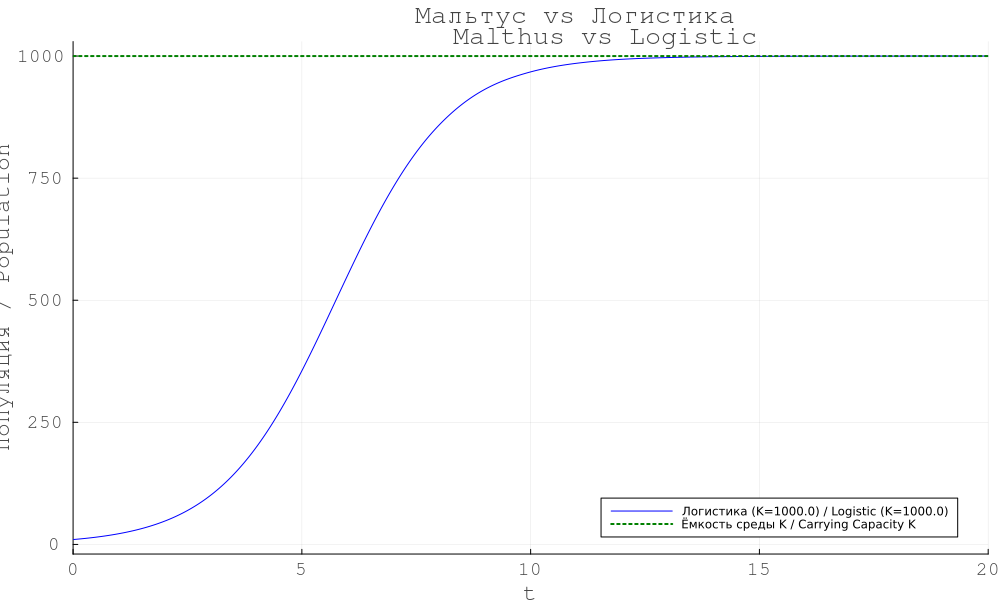

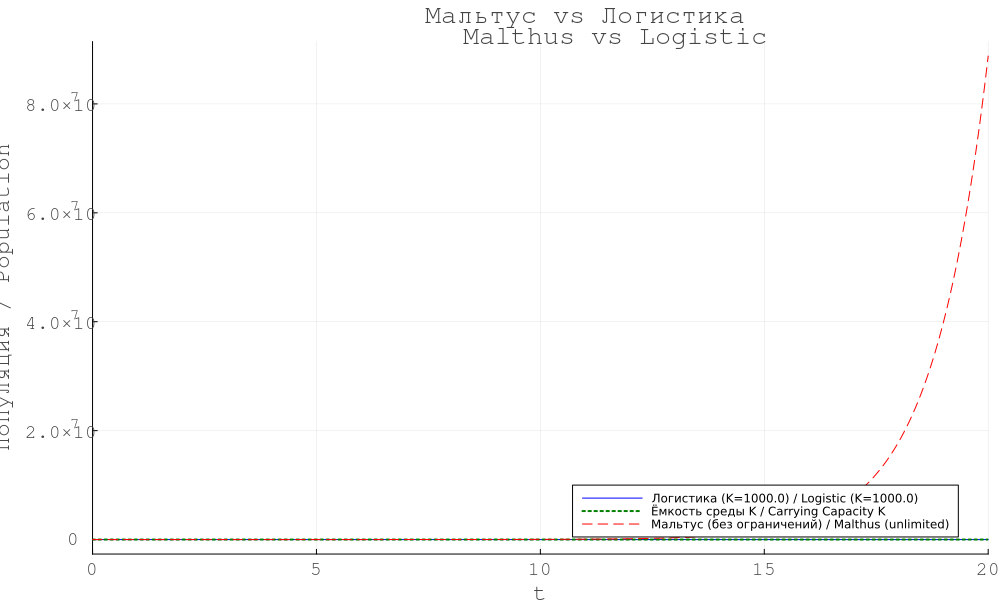

In [73]:

# График сравнения
# Comparison plot
plot_comparison = plot(title="Мальтус vs Логистика \n Malthus vs Logistic",
                       xlabel="Время / Time",
                       ylabel="Популяция / Population",
                       legend=:bottomright,
                       linewidth=3)
plot!(plot_comparison, sol_log, 
      label="Логистика (K=$K_log) / Logistic (K=$K_log)", 
      color=:blue)

# Добавим линию ёмкости среды
# Add carrying capacity line
hline!([K_log], 
       label="Ёмкость среды K / Carrying Capacity K", 
       color=:green, 
       linewidth=2, 
       linestyle=:dot)

display(plot_comparison)

plot!(plot_comparison, sol_malthus, 
      label="Мальтус (без ограничений) / Malthus (unlimited)", 
      color=:red, 
      linestyle=:dash)

plot_comparison



## 2. Сезонная модель: циклические изменения ресурсов

## 2. Seasonal Model: Cyclical Resource Changes

**Основная идея / Main Idea**

В природе ресурсы меняются сезонно. Мы можем сделать параметр $r$ зависимым от времени:
In nature, resources change seasonally. We can make parameter $r$ time-dependent:

$$ r(t) = r_0 + A \cdot \sin\left(\frac{2\pi t}{T}\right) $$

Где / Where:

*   $r_0$ — средняя скорость роста.
    $r_0$ — average growth rate.
*   $A$ — амплитуда сезонных колебаний.
    $A$ — amplitude of seasonal fluctuations.
*   $T$ — период сезона (например, 12 месяцев).
    $T$ — season period (e.g., 12 months).

Максимальная скорость роста r(t) = 0.49998753875766255
Минимальная скорость роста r(t) = -0.2999875387576626
Средняя скорость роста r0 = 0.1
Амплитуда колебаний A = 0.4
Период колебаний T = 12.0 месяцев
Ёмкость среды K = 1000.0
Поппробуйте изменить среднюю скорость роста r0_season, амплитуду A_season и период T_season, чтобы увидеть, как это влияет на динамику популяции.


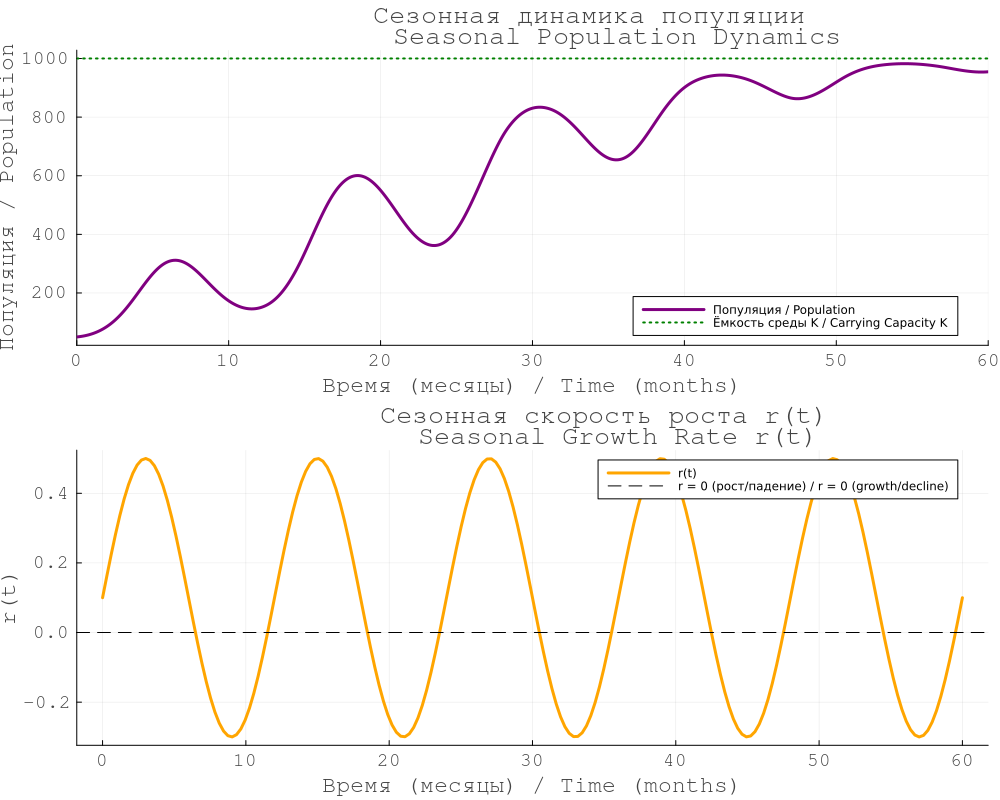

In [74]:
# ==============================================================================
# СЕЗОННАЯ МОДЕЛЬ / SEASONAL MODEL
# ==============================================================================

"""
    seasonal_model!(du, u, p, t)

Модель с сезонным изменением скорости роста.
Model with seasonally varying growth rate.
"""
function seasonal_model!(du, u, p, t)
    N = u[1]
    r0 = p[1]      # Средняя скорость роста / Average growth rate
    A = p[2]       # Амплитуда колебаний / Amplitude of fluctuations
    T = p[3]       # Период сезона / Season period
    K = p[4]       # Ёмкость среды / Carrying capacity
    
    # Сезонная скорость роста: r(t) = r0 + A * sin(2πt/T)
    # Seasonal growth rate: r(t) = r0 + A * sin(2πt/T)
    r_t = r0 + A * sin(2 * π * t / T)
    
    # Логистический рост с сезонным r
    # Logistic growth with seasonal r
    du[1] = r_t * N * (1 - N/K)
end

# Параметры
# Parameters
N0_season = [50.0]
r0_season = 0.1      # Средняя скорость / Average rate
A_season = 0.4       # Амплитуда (сезон сильно влияет) / Amplitude (strong seasonal effect)
T_season = 12.0      # 12 месяцев / 12 months
K_season = 1000.0
p_season = [r0_season, A_season, T_season, K_season]
tspan_season = (0.0, 60.0)  # 5 лет / 5 years

# Решение
# Solution
prob_season = ODEProblem(seasonal_model!, N0_season, tspan_season, p_season)
sol_season = solve(prob_season)

# Визуализация
# Visualization
p_season1 = plot(sol_season, 
                 title="Сезонная динамика популяции \n Seasonal Population Dynamics",
                 xlabel="Время (месяцы) / Time (months)",
                 ylabel="Популяция / Population",
                 linewidth=3,
                 color=:purple,
                 label="Популяция / Population")

hline!([K_season], 
       label="Ёмкость среды K / Carrying Capacity K", 
       color=:green, 
       linewidth=2, 
       linestyle=:dot)

# График скорости роста r(t)
# Plot of growth rate r(t)
t_vals = range(tspan_season[1], tspan_season[2], length=200)
r_vals = r0_season .+ A_season .* sin.(2 * π .* t_vals ./ T_season)

p_season2 = plot(t_vals, r_vals,
                 title="Сезонная скорость роста r(t) \n Seasonal Growth Rate r(t)",
                 xlabel="Время (месяцы) / Time (months)",
                 ylabel="r(t)",
                 linewidth=3,
                 color=:orange,
                 label="r(t)")

hline!([0], 
       label="r = 0 (рост/падение) / r = 0 (growth/decline)", 
       color=:black, 
       linewidth=1, 
       linestyle=:dash)

println("Максимальная скорость роста r(t) = $(maximum(r_vals))")
println("Минимальная скорость роста r(t) = $(minimum(r_vals))")
println("Средняя скорость роста r0 = $r0_season")
println("Амплитуда колебаний A = $A_season")
println("Период колебаний T = $T_season месяцев")
println("Ёмкость среды K = $K_season")
println("Поппробуйте изменить среднюю скорость роста r0_season, амплитуду A_season и период T_season, чтобы увидеть, как это влияет на динамику популяции.")
plot(p_season1, p_season2, layout=(2, 1), size=(1000, 800))

## 3. Модель с эпидемией: плотностно-зависимая смертность

## 3. Epidemic Model: Density-Dependent Mortality

**Основная идея / Main Idea**

При высокой плотности населения легче распространяются болезни. Добавим дополнительный член смертности:
At high population density, diseases spread more easily. Let's add an additional mortality term:

$$ \frac{dN}{dt} = r \cdot N \cdot \left(1 - \frac{N}{K}\right) - \beta \cdot \frac{N^2}{N + \theta} $$

Где / Where:

*   $\beta$ — коэффициент эпидемической смертности.
    $\beta$ — epidemic mortality coefficient.
*   $\theta$ — порог плотности для начала эпидемии.
    $\theta$ — density threshold for epidemic onset.

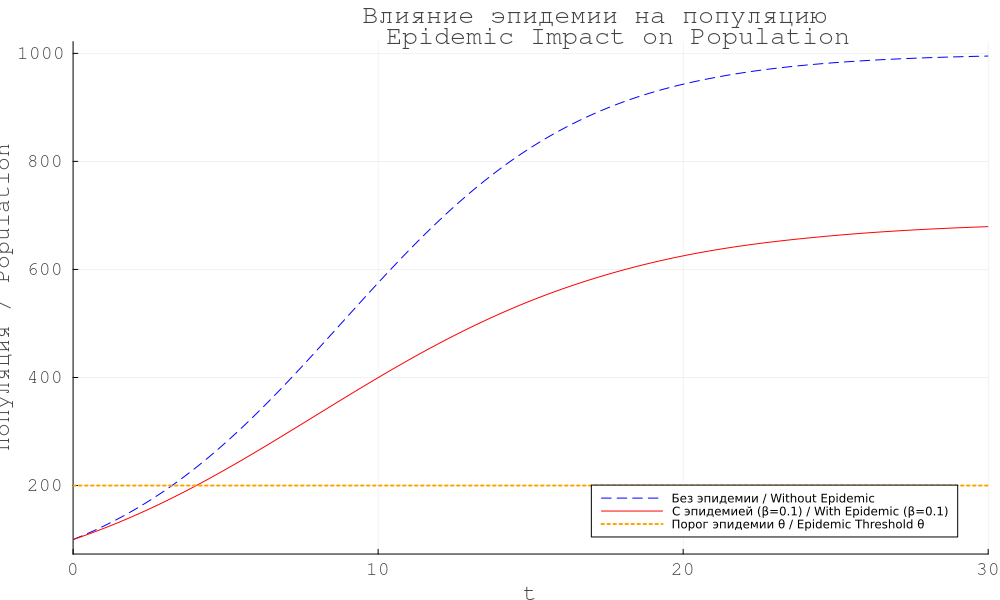

In [75]:
# ==============================================================================
# МОДЕЛЬ С ЭПИДЕМИЕЙ / EPIDEMIC MODEL
# ==============================================================================

"""
    epidemic_model!(du, u, p, t)

Модель с дополнительным членом смертности от эпидемий.
Model with additional mortality term from epidemics.
"""
function epidemic_model!(du, u, p, t)
    N = u[1]
    r = p[1]       # Скорость роста / Growth rate
    K = p[2]       # Ёмкость среды / Carrying capacity
    β = p[3]       # Коэффициент эпидемии / Epidemic coefficient
    θ = p[4]       # Порог плотности / Density threshold
    
    # Базовый логистический рост
    # Basic logistic growth
    growth = r * N * (1 - N/K)
    
    # Эпидемическая смертность (увеличивается с плотностью)
    # Epidemic mortality (increases with density)
    # Используем функцию насыщения для реалистичности
    # Using saturation function for realism
    epidemic_death = β * (N^2) / (N + θ)
    
    du[1] = growth - epidemic_death
end

# Параметры
# Parameters
N0_epid = [100.0]
r_epid = 0.25
K_epid = 1000.0
β_epid = 0.1     # Сила эпидемии / Epidemic strength
θ_epid = 200.0     # Порог (эпидемия начинается при N > 200) / Threshold (epidemic starts at N > 200)
p_epid = [r_epid, K_epid, β_epid, θ_epid]
tspan_epid = (0.0, 30.0)

# Решение
# Solution
prob_epid = ODEProblem(epidemic_model!, N0_epid, tspan_epid, p_epid)
sol_epid = solve(prob_epid)

# Сравнение с чистой логистикой
# Comparison with pure logistic
prob_log_compare = ODEProblem(logistic_model!, N0_epid, tspan_epid, [r_epid, K_epid])
sol_log_compare = solve(prob_log_compare)

# График
# Plot
plot_epid = plot(title="Влияние эпидемии на популяцию \n Epidemic Impact on Population",
                 xlabel="Время / Time",
                 ylabel="Популяция / Population",
                 legend=:bottomright,
                 linewidth=3)

plot!(plot_epid, sol_log_compare, 
      label="Без эпидемии / Without Epidemic", 
      color=:blue, 
      linestyle=:dash)

plot!(plot_epid, sol_epid, 
      label="С эпидемией (β=$β_epid) / With Epidemic (β=$β_epid)", 
      color=:red)

# Линия порога эпидемии
# Epidemic threshold line
hline!([θ_epid], 
       label="Порог эпидемии θ / Epidemic Threshold θ", 
       color=:orange, 
       linewidth=2, 
       linestyle=:dot)

plot_epid

## 4. Комбинированная модель: все факторы вместе

## 4. Combined Model: All Factors Together

**Основная идея / Main Idea**

В реальности все факторы действуют одновременно. Создадим модель, которая учитывает:
In reality, all factors act simultaneously. Let's create a model that accounts for:

1.  Логистическое ограничение.
    Logistic limitation.
2.  Сезонность.
    Seasonality.
3.  Эпидемии.
    Epidemics.
4.  Случайные колебания среды (шум).
    Random environmental fluctuations (noise).

In [76]:
# ==============================================================================
# КОМБИНИРОВАННАЯ МОДЕЛЬ / COMBINED MODEL
# ==============================================================================

"""
    combined_model!(du, u, p, t)

Полная модель со всеми факторами.
Full model with all factors.
"""
function combined_model!(du, u, p, t)
    N = u[1]
    
    # Параметры / Parameters
    r0 = p[1]      # Средняя скорость роста / Average growth rate
    A = p[2]       # Амплитуда сезонности / Seasonality amplitude
    T = p[3]       # Период сезона / Season period
    K = p[4]       # Ёмкость среды / Carrying capacity
    β = p[5]       # Коэффициент эпидемии / Epidemic coefficient
    θ = p[6]       # Порог эпидемии / Epidemic threshold
    σ = p[7]       # Сила случайного шума / Random noise strength
    
    # 1. Сезонная скорость роста
    # 1. Seasonal growth rate
    r_t = r0 + A * sin(2 * π * t / T)
    
    # 2. Логистический рост
    # 2. Logistic growth
    logistic_growth = r_t * N * (1 - N/K)
    
    # 3. Эпидемическая смертность
    # 3. Epidemic mortality
    epidemic_death = β * (N^2) / (N + θ)
    
    # 4. Случайный шум среды (детерминированная аппроксимация)
    # 4. Random environmental noise (deterministic approximation)
    # Используем синус с разной частотой для имитации шума
    # Using sine with different frequency to simulate noise
    noise = σ * sin(7.3 * t) * cos(3.1 * t) * N / K
    
    # Итоговое уравнение
    # Final equation
    du[1] = logistic_growth - epidemic_death + noise
end


combined_model!

In [77]:

# Параметры комбинированной модели
# Combined model parameters
N0_comb = [50.0]
p_comb = [
    0.45,    # r0 - средняя скорость роста / average growth rate
    0.3,    # A - амплитуда сезонности / seasonality amplitude
    12.0,   # T - период сезона / season period
    1000.0, # K - ёмкость среды / carrying capacity
    0.008, # β - эпидемия / epidemic
    150.0,  # θ - порог эпидемии / epidemic threshold
    0.05    # σ - шум / noise
]
tspan_comb = (0.0, 100.0)


(0.0, 100.0)

In [78]:
using StatsBase
# Решение
# Solution
prob_comb = ODEProblem(combined_model!, N0_comb, tspan_comb, p_comb)
sol_comb = solve(prob_comb);
println("Максимальная популяция в комбинированной модели: $(maximum(sol_comb[1, :]))")
println("Минимальная популяция в комбинированной модели: $(minimum(sol_comb[1, :]))")
println("Средняя популяция в комбинированной модели: $(mean(sol_comb[1, :]))")
println("Параметры комбинированной модели:")
println("Средняя скорость роста r0 = $(p_comb[1])")
println("Амплитуда сезонности A = $(p_comb[2])")
println("Период сезона T = $(p_comb[3]) месяцев")
println("Ёмкость среды K = $(p_comb[4])")
println("Коэффициент эпидемии β = $(p_comb[5])")
println("Порог эпидемии θ = $(p_comb[6])")
println("Сила шума σ = $(p_comb[7])")
println("Попробуйте изменить параметры в p_comb, чтобы увидеть, как это влияет на динамику популяции.")


Максимальная популяция в комбинированной модели: 989.5190833289051
Минимальная популяция в комбинированной модели: 50.0
Средняя популяция в комбинированной модели: 795.5799407849613
Параметры комбинированной модели:
Средняя скорость роста r0 = 0.45
Амплитуда сезонности A = 0.3
Период сезона T = 12.0 месяцев
Ёмкость среды K = 1000.0
Коэффициент эпидемии β = 0.008
Порог эпидемии θ = 150.0
Сила шума σ = 0.05
Попробуйте изменить параметры в p_comb, чтобы увидеть, как это влияет на динамику популяции.


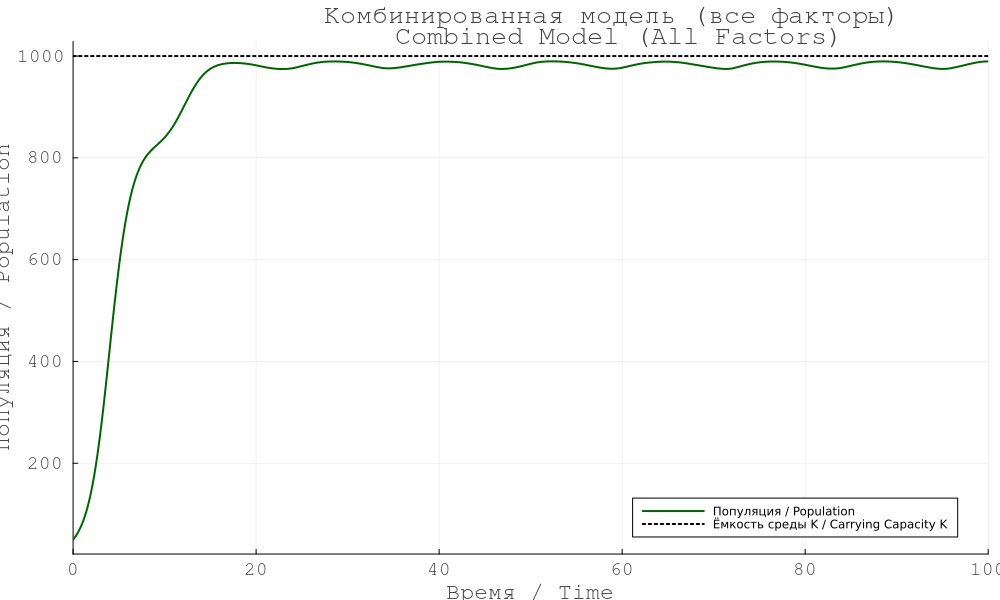

In [79]:

# Визуализация
# Visualization
plot_comb = plot(sol_comb, 
                 title="Комбинированная модель (все факторы) \n Combined Model (All Factors)",
                 xlabel="Время / Time",
                 ylabel="Популяция / Population",
                 linewidth=2,
                 color=:darkgreen,
                 label="Популяция / Population",
                 legend=:bottomright)

hline!([p_comb[4]], 
       label="Ёмкость среды K / Carrying Capacity K", 
       color=:black, 
       linewidth=2, 
       linestyle=:dot)

plot_comb

## 5. Фазовый портрет и анализ устойчивости

## 5. Phase Portrait and Stability Analysis

**Основная идея / Main Idea**

Фазовый портрет показывает зависимость $dN/dt$ от $N$. Точки, где $dN/dt = 0$, являются равновесиями.
Phase portrait shows dependence of $dN/dt$ on $N$. Points where $dN/dt = 0$ are equilibria.

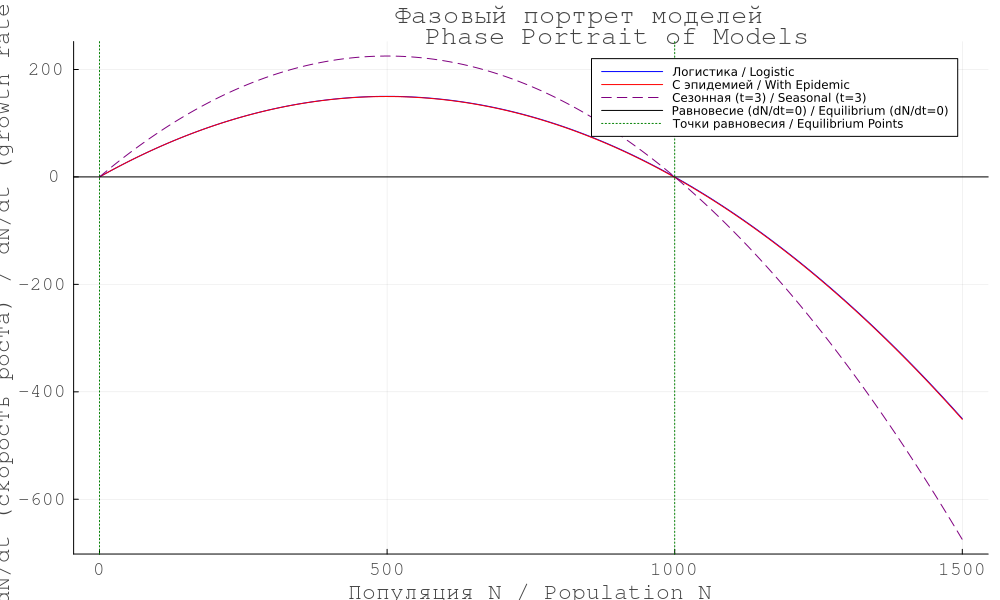

In [80]:
# ==============================================================================
# ФАЗОВЫЙ ПОРТРЕТ / PHASE PORTRAIT
# ==============================================================================

# Функция для вычисления dN/dt при разных N
# Function to compute dN/dt at different N values
function compute_dNdt(N_values, model_func, p; t=0)
    dNdt_values = []
    for N in N_values
        u = [N]
        du = [0.0]
        model_func(du, u, p, t)
        push!(dNdt_values, du[1])
    end
    return dNdt_values
end

# Диапазон значений популяции
# Population value range
N_range = range(0, 1500, length=200)

# Вычисляем dN/dt для разных моделей
# Compute dN/dt for different models
dNdt_logistic = compute_dNdt(N_range, logistic_model!, [0.6, 1000.0])
dNdt_epidemic = compute_dNdt(N_range, epidemic_model!, [0.6, 1000.0, 0.001, 200.0])
dNdt_seasonal = compute_dNdt(N_range, seasonal_model!, [0.5, 0.4, 12.0, 1000.0], t=3)  # t=3 месяца

# График фазового портрета
# Phase portrait plot
plot_phase = plot(title="Фазовый портрет моделей \n Phase Portrait of Models",
                  xlabel="Популяция N / Population N",
                  ylabel="dN/dt (скорость роста) / dN/dt (growth rate)",
                  legend=:topright,
                  linewidth=3)

plot!(plot_phase, N_range, dNdt_logistic, 
      label="Логистика / Logistic", 
      color=:blue)

plot!(plot_phase, N_range, dNdt_epidemic, 
      label="С эпидемией / With Epidemic", 
      color=:red)

plot!(plot_phase, N_range, dNdt_seasonal, 
      label="Сезонная (t=3) / Seasonal (t=3)", 
      color=:purple,
      linestyle=:dash)

# Линия нулевого роста
# Zero growth line
hline!([0], 
       label="Равновесие (dN/dt=0) / Equilibrium (dN/dt=0)", 
       color=:black, 
       linewidth=1, 
       linestyle=:solid)

# Точки равновесия для логистики
# Equilibrium points for logistic
vline!([0, 1000.0], 
       label="Точки равновесия / Equilibrium Points", 
       color=:green, 
       linewidth=1, 
       linestyle=:dot)

plot_phase

## 6. Анализ чувствительности к параметрам

## 6. Parameter Sensitivity Analysis

**Основная идея / Main Idea**

Важно понять, какие параметры наиболее сильно влияют на результат. Это помогает в планировании экспериментов и сборе данных.
It's important to understand which parameters most strongly affect the result. This helps in experiment planning and data collection.

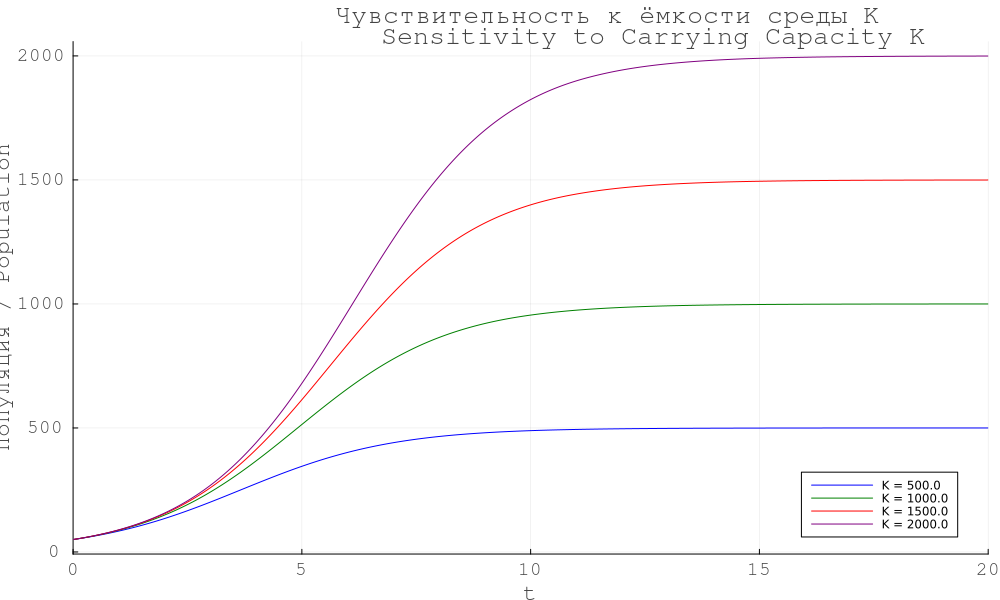

In [81]:
# ==============================================================================
# АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ / SENSITIVITY ANALYSIS
# ==============================================================================

# Функция для запуска модели с разными параметрами K
# Function to run model with different K parameters
function run_with_different_K(K_values)
    plots_array = []
    
    for K in K_values
        p_temp = [0.6, K]
        prob_temp = ODEProblem(logistic_model!, [50.0], (0.0, 20.0), p_temp)
        sol_temp = solve(prob_temp)
        push!(plots_array, sol_temp)
    end
    
    return plots_array
end

# Разные значения ёмкости среды
# Different carrying capacity values
K_values = [500.0, 1000.0, 1500.0, 2000.0]
solutions_K = run_with_different_K(K_values)

# График
# Plot
plot_sensitivity = plot(title="Чувствительность к ёмкости среды K \n Sensitivity to Carrying Capacity K",
                        xlabel="Время / Time",
                        ylabel="Популяция / Population",
                        legend=:bottomright,
                        linewidth=3)

colors = [:blue, :green, :red, :purple]
for i in eachindex(K_values)
    plot!(plot_sensitivity, solutions_K[i], 
          label="K = $(K_values[i])", 
          color=colors[i])
end

plot_sensitivity

## 7. Источники и литература

## 7. References and Literature

**Классические работы / Classical Works:**

1.  **Verhulst, P. F. (1838).** *Notice sur la loi que la population suit dans son accroissement*. Correspondance Mathématique et Physique, 10, 113-121.
    *   Оригинальная работа о логистическом уравнении.
    *   Original work on the logistic equation.
    *   [Google Scholar](https://scholar.google.com/)

2.  **Lotka, A. J. (1925).** *Elements of Physical Biology*. Williams & Wilkins.
    *   Классика математической биологии.
    *   Classic of mathematical biology.

3.  **Volterra, V. (1926).** *Variazioni e fluttuazioni del numero d'individui in specie animali conviventi*.
    *   Работа о хищник-жертва моделях.
    *   Work on predator-prey models.

**Современные учебники / Modern Textbooks:**

4.  **Murray, J. D. (2002).** *Mathematical Biology I & II*. Springer.
    *   [Springer Link](https://www.springer.com/gp/book/9780387952239)
    *   Стандартный учебник по биоматематике.
    *   Standard textbook on biomathematics.

5.  **Edelstein-Keshet, L. (2005).** *Mathematical Models in Biology*. SIAM.
    *   [SIAM Link](https://www.siam.org/books/textbooks/ot46)
    *   Отличное введение для биологов.
    *   Great introduction for biologists.

6.  **Kot, M. (2001).** *Elements of Mathematical Ecology*. Cambridge University Press.
    *   [Cambridge Link](https://www.cambridge.org/core/books/elements-of-mathematical-ecology/)

**Статьи о применении / Application Papers:**

7.  **Bacaër, N. (2007).** *Approximation of the basic reproduction number R0 for vector-borne diseases with a periodic vector population*. Bulletin of Mathematical Biology.
    *   О сезонных эпидемиологических моделях.
    *   On seasonal epidemiological models.
    *   [DOI: 10.1007/s11538-006-9166-9](https://doi.org/10.1007/s11538-006-9166-9)

8.  **Liu, W. M., et al. (1986).** *Influence of nonlinear incidence rates upon the behavior of SIRS epidemiological models*. Journal of Mathematical Biology.
    *   О плотностно-зависимой смертности.
    *   On density-dependent mortality.
    *   [DOI: 10.1007/BF00276439](https://doi.org/10.1007/BF00276439)

**Ресурсы по Julia / Julia Resources:**

9.  **SciML Ecosystem:** [https://sciml.ai/](https://sciml.ai/)
    *   Документация по DifferentialEquations.jl.
    *   Documentation for DifferentialEquations.jl.

10.  **JuliaHub:** [https://juliahub.com/](https://juliahub.com/)
     *   Поиск пакетов для биологии.
     *   Search for biology packages.

## 8. Домашнее задание / Exercises

1.  **Параметрический анализ:** Измените параметр $\beta$ (сила эпидемии) от 0 до 0.005. При каком значении популяция начинает вымирать?
    **Parameter Analysis:** Change parameter $\beta$ (epidemic strength) from 0 to 0.005. At what value does the population start to go extinct?

2.  **Сезонная эпидемия:** Модифицируйте модель так, чтобы эпидемия была сильнее зимой (сделайте $\beta$ зависимым от времени).
    **Seasonal Epidemic:** Modify the model so that the epidemic is stronger in winter (make $\beta$ time-dependent).

3.  **Две популяции:** Создайте модель с двумя конкурирующими видами (модель Лотки-Вольтерры для конкуренции).
    **Two Populations:** Create a model with two competing species (Lotka-Volterra competition model).

4.  **Стохастичность:** Используйте `SDEProblem` из `DifferentialEquations.jl` для добавления настоящего случайного шума вместо детерминированной аппроксимации.
    **Stochasticity:** Use `SDEProblem` from `DifferentialEquations.jl` to add real random noise instead of deterministic approximation.

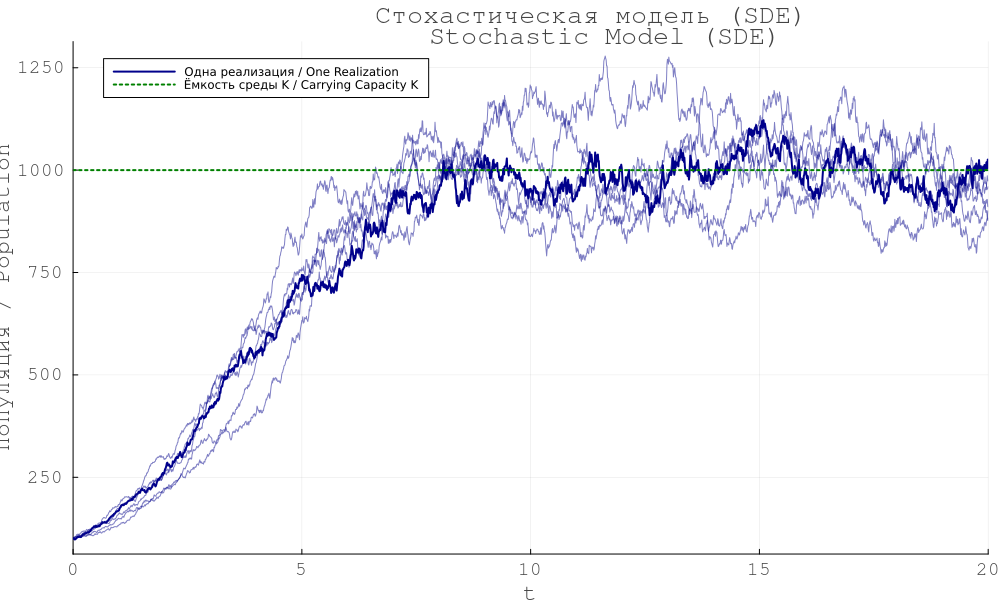

In [82]:
# ==============================================================================
# ПРИМЕР: СТОХАСТИЧЕСКАЯ МОДЕЛЬ (SDE)
# EXAMPLE: STOCHASTIC MODEL (SDE)
# ==============================================================================

# Для настоящего случайного шума используем SDE (Stochastic Differential Equation)
# For real random noise we use SDE (Stochastic Differential Equation)

"""
    sde_drift!(du, u, p, t)

Детерминированная часть (дрейф).
Deterministic part (drift).
"""
function sde_drift!(du, u, p, t)
    N = u[1]
    r = p[1]
    K = p[2]
    du[1] = r * N * (1 - N/K)
end

"""
    sde_diffusion!(du, u, p, t)

Стохастическая часть (диффузия/шум).
Stochastic part (diffusion/noise).
"""
function sde_diffusion!(du, u, p, t)
    N = u[1]
    σ = p[3]
    # Шум пропорционален размеру популяции
    # Noise proportional to population size
    du[1] = σ * N
end

# Параметры SDE
# SDE Parameters
N0_sde = [100.0]
p_sde = [0.6, 1000.0, 0.1]  # r, K, σ (сила шума / noise strength)
tspan_sde = (0.0, 20.0)

# Создаём SDE задачу
# Create SDE problem
prob_sde = SDEProblem(sde_drift!, sde_diffusion!, N0_sde, tspan_sde, p_sde)

# Решаем (метод EM - Euler-Maruyama)
# Solve (EM method - Euler-Maruyama)
sol_sde = solve(prob_sde, EM(), dt=0.01)

# График стохастической траектории
# Stochastic trajectory plot
plot_sde = plot(sol_sde, 
                title="Стохастическая модель (SDE) \n Stochastic Model (SDE)",
                xlabel="Время / Time",
                ylabel="Популяция / Population",
                linewidth=2,
                color=:darkblue,
                label="Одна реализация / One Realization")

# Добавим несколько реализаций для визуализации вариативности
# Add multiple realizations to visualize variability
for i in 1:5
    sol_sde_i = solve(prob_sde, EM(), dt=0.01)
    plot!(sol_sde_i, 
          linewidth=1, 
          alpha=0.5, 
          color=:darkblue, 
          label="")
end

hline!([p_sde[2]], 
       label="Ёмкость среды K / Carrying Capacity K", 
       color=:green, 
       linewidth=2, 
       linestyle=:dot)

plot_sde

## 9. Сводная таблица моделей

## 9. Model Summary Table

| Модель / Model             | Уравнение / Equation           | Применение / Application                           | Ограничения / Limitations                          |
| -------------------------- | ------------------------------ | -------------------------------------------------- | -------------------------------------------------- |
| **Мальтус** / Malthus      | $dN/dt = rN$                   | Бактерии, ранний рост / Bacteria, early growth     | Нет ограничений / No limits                        |
| **Логистика** / Logistic   | $dN/dt = rN(1-N/K)$            | Популяции с ресурсами / Populations with resources | Постоянная K / Constant K                          |
| **Сезонная** / Seasonal    | $r(t) = r_0 + A\sin(2\pi t/T)$ | Сезонные виды / Seasonal species                   | Периодичность / Periodicity                        |
| **С эпидемией** / Epidemic | $- \beta N^2/(N+\theta)$       | Плотные популяции / Dense populations              | Упрощённая эпидемиология / Simplified epidemiology |
| **SDE**                    | $dN = f(N)dt + \sigma N dW$    | Малые популяции, шум / Small populations, noise    | Сложнее анализ / Harder analysis                   |

---

## 

## 10. Выводы

## 10. Conclusions

**Ключевые выводы / Key Takeaways:**

1.  **Простые модели полезны** — модель Мальтуса хороша для краткосрочных прогнозов.
    **Simple models are useful** — Malthus model is good for short-term forecasts.

2.  **Ограничения важны** — логистическая модель более реалистична для долгосрочного прогнозирования.
    **Limitations matter** — logistic model is more realistic for long-term forecasting.

3.  **Сложность растёт** — добавление каждого фактора усложняет анализ, но повышает точность.
    **Complexity grows** — adding each factor complicates analysis but improves accuracy.

4.  **Julia эффективна** — пакет `DifferentialEquations.jl` позволяет легко переходить от простых к сложным моделям.
    **Julia is efficient** — `DifferentialEquations.jl` package allows easy transition from simple to complex models.

In [83]:
# ==============================================================================
# СОХРАНЕНИЕ РЕЗУЛЬТАТОВ / SAVE RESULTS
# ==============================================================================

# Сохранить графики в файлы
# Save plots to files
savefig("logistic_comparison.png")
savefig("seasonal_model.png")
savefig("epidemic_model.png")
savefig("combined_model.png")
savefig("phase_portrait.png")
savefig("sensitivity_analysis.png")
savefig("stochastic_model.png")

println("Графики сохранены / Plots saved successfully!")
println("Файлы: logistic_comparison.png, seasonal_model.png, ...")
println("Files: logistic_comparison.png, seasonal_model.png, ...")

Графики сохранены / Plots saved successfully!
Файлы: logistic_comparison.png, seasonal_model.png, ...
Files: logistic_comparison.png, seasonal_model.png, ...
